<a href="https://colab.research.google.com/github/madhusowmya/madhusowmya.github.io/blob/master/CNN_2_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [86]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trainn_cnn.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Testt_cnn.csv')

In [87]:
y = train['label']
print(y)
train = train.drop('label',  axis =1)
#print(train)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [88]:
train=train/225.0#pixels normalizing 
#print(type(train))#df
test = test/225.0
train = np.array(train)
print(train.size)#array
test = np.array(test)
print(test.size)
train = train.reshape(train.shape[0], 28, 28,1)#reshaping 
test = test.reshape(test.shape[0], 28, 28,1)

32928000
21952000


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, y, test_size=0.2)


In [90]:
#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_test= tf.keras.utils.to_categorical(Y_test, num_classes=10)
print(Y_train[1:10])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [91]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
model1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2048)            

In [92]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# from IPython.display import Image
# Image("model.png")

SGD lr = default (0.01)

In [93]:
#Compiling the model OPTIMIZER IS SGD 
model1.compile(optimizer= tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  
history1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  3/525 [..............................] - ETA: 14s - loss: 2.8316 - accuracy: 0.1094

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 45ms/step - loss: 0.5900 - accuracy: 0.8115 - val_loss: 0.0907 - val_accuracy: 0.9725
Epoch 2/15
525/525 [==============================] - 24s 46ms/step - loss: 0.2163 - accuracy: 0.9324 - val_loss: 0.0555 - val_accuracy: 0.9837
Epoch 3/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1565 - accuracy: 0.9513 - val_loss: 0.0583 - val_accuracy: 0.9825
Epoch 4/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1300 - accuracy: 0.9588 - val_loss: 0.0438 - val_accuracy: 0.9870
Epoch 5/15
525/525 [==============================] - 24s 47ms/step - loss: 0.1136 - accuracy: 0.9652 - val_loss: 0.0421 - val_accuracy: 0.9876
Epoch 6/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1059 - accuracy: 0.9670 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 7/15
525/525 [==============================] - 25s 48ms/step - loss: 0.0996 - accuracy: 0.9693 - val_loss: 0.0322 - val_accuracy: 0.9892
Epo

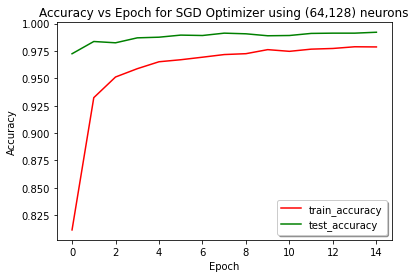

In [94]:
#Comparing training and testing accuraries for the model in which number of nuerons increases from  (64,128) 
# plt.plot(history1.history['loss'], color='r')
# plt.plot(history1.history['val_loss'], color='g')
# plt.legend(('loss', 'val_loss'), loc='upper right', shadow=True)
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.show()
plt.plot(history1.history['accuracy'], color='r')
plt.plot(history1.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.title('Accuracy vs Epoch for SGD Optimizer using (64,128) neurons')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [95]:
#Plotting Confusion Matrix
y_pred1 = model1.predict(X_test)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_test, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[888   0   1   1   0   1   5   0   4   0]
 [  0 948   1   2   2   0   1   5   1   0]
 [  0   1 832   1   3   0   0   0   1   0]
 [  0   0   0 843   0   2   0   0   1   1]
 [  0   1   0   0 737   0   1   1   0   1]
 [  0   0   0   1   0 784   3   0   0   1]
 [  0   0   0   0   0   0 788   0   0   0]
 [  0   0   7   1   2   0   0 863   0   3]
 [  0   0   0   0   0   1   1   0 811   0]
 [  1   0   0   1   5   0   0   0   1 840]]


RMS Prop lr =0.001 ,default

In [13]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [14]:
#Compiling the model OPTIMIZER IS RMSProp
model1.compile(optimizer= tf.keras.optimizers.RMSprop(lr=0.001, momentum=0.0,rho=0.9,epsilon=1e-07), loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  
history_RMSprop = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  2/525 [..............................] - ETA: 15s - loss: 2.7820 - accuracy: 0.1328

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 28s 53ms/step - loss: 0.4256 - accuracy: 0.8647 - val_loss: 0.0723 - val_accuracy: 0.9780
Epoch 2/15
525/525 [==============================] - 28s 52ms/step - loss: 0.1586 - accuracy: 0.9510 - val_loss: 0.0573 - val_accuracy: 0.9824
Epoch 3/15
525/525 [==============================] - 27s 52ms/step - loss: 0.1204 - accuracy: 0.9625 - val_loss: 0.0604 - val_accuracy: 0.9806
Epoch 4/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1031 - accuracy: 0.9674 - val_loss: 0.0502 - val_accuracy: 0.9850
Epoch 5/15
525/525 [==============================] - 28s 53ms/step - loss: 0.0950 - accuracy: 0.9708 - val_loss: 0.0332 - val_accuracy: 0.9898
Epoch 6/15
525/525 [==============================] - 27s 52ms/step - loss: 0.0830 - accuracy: 0.9744 - val_loss: 0.0576 - val_accuracy: 0.9832
Epoch 7/15
525/525 [==============================] - 28s 54ms/step - loss: 0.0745 - accuracy: 0.9762 - val_loss: 0.0271 - val_accuracy: 0.9915
Epo

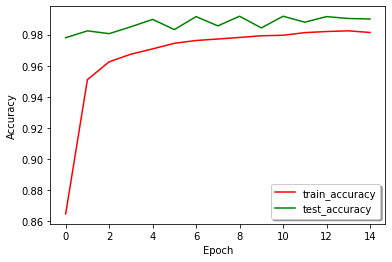

In [15]:

plt.plot(history_RMSprop.history['accuracy'], color='r')
plt.plot(history_RMSprop.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


ADAM lr =0.001 default

In [16]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model1.summary()

In [17]:
#Compiling the model OPTIMIZER IS Adam
model1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam'), loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  
history1_Adam = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.1100 - accuracy: 0.0938

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 45ms/step - loss: 0.4778 - accuracy: 0.8481 - val_loss: 0.0800 - val_accuracy: 0.9769
Epoch 2/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1657 - accuracy: 0.9482 - val_loss: 0.0556 - val_accuracy: 0.9820
Epoch 3/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1295 - accuracy: 0.9593 - val_loss: 0.0763 - val_accuracy: 0.9770
Epoch 4/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1068 - accuracy: 0.9672 - val_loss: 0.0434 - val_accuracy: 0.9857
Epoch 5/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0985 - accuracy: 0.9690 - val_loss: 0.0370 - val_accuracy: 0.9896
Epoch 6/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0868 - accuracy: 0.9721 - val_loss: 0.0397 - val_accuracy: 0.9882
Epoch 7/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0795 - accuracy: 0.9753 - val_loss: 0.0304 - val_accuracy: 0.9898
Epo

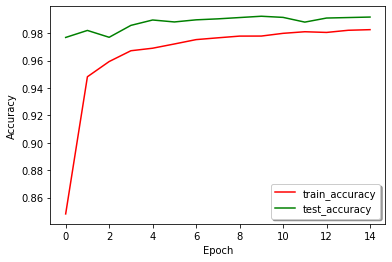

In [18]:
plt.plot(history1_Adam.history['accuracy'], color='r')
plt.plot(history1_Adam.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Adamax lr =0.001

In [19]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model1.summary()

In [20]:
#Compiling the model
model1.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adamax'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adamax1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.1597 - accuracy: 0.0469

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 46ms/step - loss: 0.6739 - accuracy: 0.7868 - val_loss: 0.0957 - val_accuracy: 0.9749
Epoch 2/15
525/525 [==============================] - 23s 44ms/step - loss: 0.2637 - accuracy: 0.9206 - val_loss: 0.0700 - val_accuracy: 0.9794
Epoch 3/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1864 - accuracy: 0.9435 - val_loss: 0.0520 - val_accuracy: 0.9858
Epoch 4/15
525/525 [==============================] - 23s 45ms/step - loss: 0.1494 - accuracy: 0.9538 - val_loss: 0.0448 - val_accuracy: 0.9864
Epoch 5/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1286 - accuracy: 0.9603 - val_loss: 0.0411 - val_accuracy: 0.9888
Epoch 6/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1152 - accuracy: 0.9641 - val_loss: 0.0361 - val_accuracy: 0.9892
Epoch 7/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1043 - accuracy: 0.9676 - val_loss: 0.0414 - val_accuracy: 0.9875
Epo

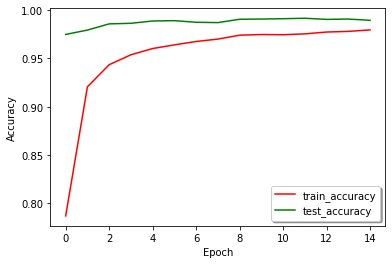

In [21]:
plt.plot(history_Adamax1.history['accuracy'], color='r')
plt.plot(history_Adamax1.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

AdaGrad

In [22]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model1.summary()

In [23]:
#Compiling the model
model1.compile(optimizer= tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1, epsilon=1e-07,name='Adagrad'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adagrad1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  3/525 [..............................] - ETA: 14s - loss: 2.9568 - accuracy: 0.1198

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 45ms/step - loss: 1.5487 - accuracy: 0.4879 - val_loss: 0.4168 - val_accuracy: 0.9090
Epoch 2/15
525/525 [==============================] - 23s 44ms/step - loss: 0.9837 - accuracy: 0.6815 - val_loss: 0.2766 - val_accuracy: 0.9412
Epoch 3/15
525/525 [==============================] - 23s 44ms/step - loss: 0.7760 - accuracy: 0.7565 - val_loss: 0.2138 - val_accuracy: 0.9556
Epoch 4/15
525/525 [==============================] - 23s 45ms/step - loss: 0.6658 - accuracy: 0.7926 - val_loss: 0.1844 - val_accuracy: 0.9593
Epoch 5/15
525/525 [==============================] - 23s 44ms/step - loss: 0.6028 - accuracy: 0.8172 - val_loss: 0.1615 - val_accuracy: 0.9636
Epoch 6/15
525/525 [==============================] - 23s 44ms/step - loss: 0.5416 - accuracy: 0.8373 - val_loss: 0.1458 - val_accuracy: 0.9645
Epoch 7/15
525/525 [==============================] - 23s 43ms/step - loss: 0.5082 - accuracy: 0.8461 - val_loss: 0.1357 - val_accuracy: 0.9669
Epo

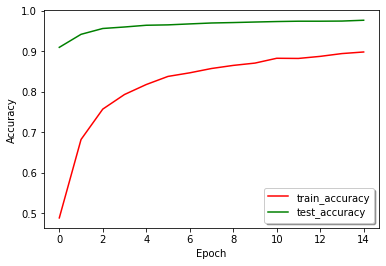

In [24]:
plt.plot(history_Adagrad1.history['accuracy'], color='r')
plt.plot(history_Adagrad1.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Adadelta

In [25]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model1.summary()

In [26]:
1#Compiling the model
model1.compile(optimizer= tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07,name='Adadelta'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adadelta1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  3/525 [..............................] - ETA: 14s - loss: 3.0903 - accuracy: 0.1146

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 45ms/step - loss: 2.9190 - accuracy: 0.1072 - val_loss: 2.2130 - val_accuracy: 0.1762
Epoch 2/15
525/525 [==============================] - 24s 45ms/step - loss: 2.6306 - accuracy: 0.1569 - val_loss: 1.8950 - val_accuracy: 0.2992
Epoch 3/15
525/525 [==============================] - 24s 45ms/step - loss: 2.4254 - accuracy: 0.2085 - val_loss: 1.6286 - val_accuracy: 0.4595
Epoch 4/15
525/525 [==============================] - 24s 45ms/step - loss: 2.2661 - accuracy: 0.2590 - val_loss: 1.4096 - val_accuracy: 0.5806
Epoch 5/15
525/525 [==============================] - 23s 44ms/step - loss: 2.1372 - accuracy: 0.2944 - val_loss: 1.2315 - val_accuracy: 0.6631
Epoch 6/15
525/525 [==============================] - 23s 44ms/step - loss: 2.0156 - accuracy: 0.3337 - val_loss: 1.1012 - val_accuracy: 0.7160
Epoch 7/15
525/525 [==============================] - 23s 44ms/step - loss: 1.9330 - accuracy: 0.3577 - val_loss: 0.9853 - val_accuracy: 0.7606
Epo

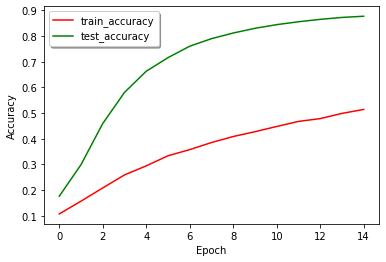

In [27]:
plt.plot(history_Adadelta1.history['accuracy'], color='r')
plt.plot(history_Adadelta1.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Nadam

In [28]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model1.summary()

In [29]:
#Compiling the model
model1.compile(optimizer= tf.keras.optimizers.Nadam(learning_rate=0.001,epsilon=1e-07,name='NAdam'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_NAdam1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  2/525 [..............................] - ETA: 13s - loss: 2.7871 - accuracy: 0.1172

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 29s 56ms/step - loss: 0.4477 - accuracy: 0.8563 - val_loss: 0.0640 - val_accuracy: 0.9811
Epoch 2/15
525/525 [==============================] - 29s 56ms/step - loss: 0.1632 - accuracy: 0.9492 - val_loss: 0.0575 - val_accuracy: 0.9813
Epoch 3/15
525/525 [==============================] - 29s 55ms/step - loss: 0.1256 - accuracy: 0.9604 - val_loss: 0.0466 - val_accuracy: 0.9860
Epoch 4/15
525/525 [==============================] - 29s 54ms/step - loss: 0.1013 - accuracy: 0.9681 - val_loss: 0.0439 - val_accuracy: 0.9868
Epoch 5/15
525/525 [==============================] - 28s 53ms/step - loss: 0.0919 - accuracy: 0.9712 - val_loss: 0.0345 - val_accuracy: 0.9896
Epoch 6/15
525/525 [==============================] - 29s 56ms/step - loss: 0.0865 - accuracy: 0.9721 - val_loss: 0.0355 - val_accuracy: 0.9898
Epoch 7/15
525/525 [==============================] - 30s 57ms/step - loss: 0.0785 - accuracy: 0.9754 - val_loss: 0.0323 - val_accuracy: 0.9904
Epo

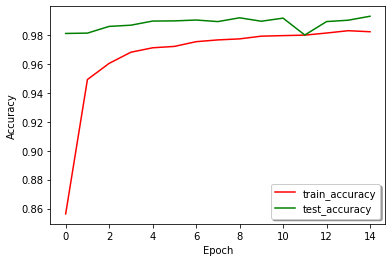

In [30]:
plt.plot(history_NAdam1.history['accuracy'], color='r')
plt.plot(history_NAdam1.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

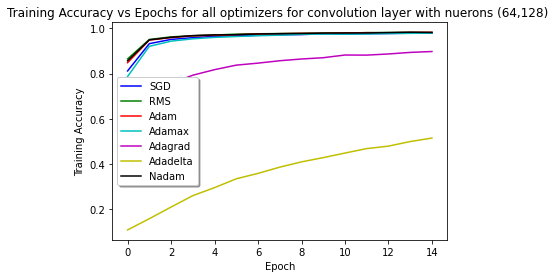

In [96]:
plt.plot(history1.history['accuracy'], color='b')
plt.plot(history_RMSprop.history['accuracy'], color='g')
plt.plot(history1_Adam.history['accuracy'], color='r')
plt.plot(history_Adamax1.history['accuracy'], color='c')
plt.plot(history_Adagrad1.history['accuracy'], color='m')
plt.plot(history_Adadelta1.history['accuracy'], color='y')
plt.plot(history_NAdam1.history['accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.title('Training Accuracy vs Epochs for all optimizers for convolution layer with nuerons (64,128) ')
plt.show()



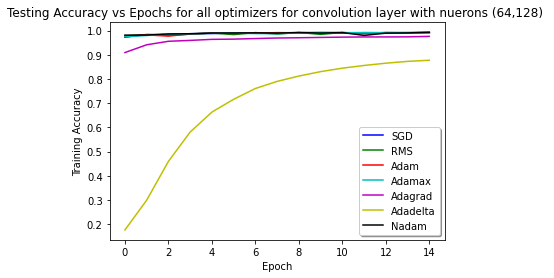

In [98]:
plt.plot(history1.history['val_accuracy'], color='b')
plt.plot(history_RMSprop.history['val_accuracy'], color='g')
plt.plot(history1_Adam.history['val_accuracy'], color='r')
plt.plot(history_Adamax1.history['val_accuracy'], color='c')
plt.plot(history_Adagrad1.history['val_accuracy'], color='m')
plt.plot(history_Adadelta1.history['val_accuracy'], color='y')
plt.plot(history_NAdam1.history['val_accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.title('Testing Accuracy vs Epochs for all optimizers for convolution layer with nuerons (64,128) ')
plt.show()



(128,256)

In [101]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 8, 8, 256)         819456    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 4096)            

SGD

In [104]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  


In [106]:
history_SGD2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.3211 - accuracy: 0.0312

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 26s 50ms/step - loss: 0.6081 - accuracy: 0.8038 - val_loss: 0.0762 - val_accuracy: 0.9781
Epoch 2/15
525/525 [==============================] - 27s 51ms/step - loss: 0.2162 - accuracy: 0.9316 - val_loss: 0.0614 - val_accuracy: 0.9785
Epoch 3/15
525/525 [==============================] - 26s 50ms/step - loss: 0.1516 - accuracy: 0.9533 - val_loss: 0.0453 - val_accuracy: 0.9852
Epoch 4/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1285 - accuracy: 0.9590 - val_loss: 0.0406 - val_accuracy: 0.9883
Epoch 5/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1029 - accuracy: 0.9673 - val_loss: 0.0368 - val_accuracy: 0.9889
Epoch 6/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0978 - accuracy: 0.9690 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch 7/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0875 - accuracy: 0.9727 - val_loss: 0.0307 - val_accuracy: 0.9923
Epo

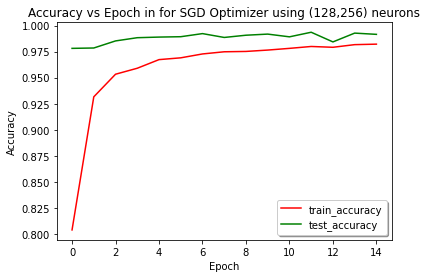

In [107]:
plt.plot(history_SGD2.history['accuracy'], color='r')
plt.plot(history_SGD2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.title('Accuracy vs Epoch in for SGD Optimizer using (128,256) neurons')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [38]:
# #Plotting Confusion Matrix
# y_pred2 = model2.predict(X_val)
# y_pred2 = np.argmax(y_pred2, axis=1)
# y_true = np.argmax(Y_val, axis=1)
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_true, y_pred2)
# #print(cm)

RMprop

In [39]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [40]:
 #Compiling the model OPTIMIZER IS SGD 
model2.compile(optimizer= tf.keras.optimizers.RMSprop(lr=0.001, momentum=0.0,rho=0.9,epsilon=1e-07), loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  
history_RMSprop2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  2/525 [..............................] - ETA: 13s - loss: 2.3661 - accuracy: 0.2656

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 27s 51ms/step - loss: 0.3977 - accuracy: 0.8724 - val_loss: 0.1469 - val_accuracy: 0.9546
Epoch 2/15
525/525 [==============================] - 27s 52ms/step - loss: 0.1482 - accuracy: 0.9543 - val_loss: 0.0810 - val_accuracy: 0.9748
Epoch 3/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1105 - accuracy: 0.9656 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 4/15
525/525 [==============================] - 28s 53ms/step - loss: 0.0900 - accuracy: 0.9715 - val_loss: 0.0421 - val_accuracy: 0.9879
Epoch 5/15
525/525 [==============================] - 28s 53ms/step - loss: 0.0834 - accuracy: 0.9738 - val_loss: 0.0333 - val_accuracy: 0.9905
Epoch 6/15
525/525 [==============================] - 27s 52ms/step - loss: 0.0727 - accuracy: 0.9777 - val_loss: 0.0349 - val_accuracy: 0.9896
Epoch 7/15
525/525 [==============================] - 28s 53ms/step - loss: 0.0708 - accuracy: 0.9783 - val_loss: 0.0276 - val_accuracy: 0.9915
Epo

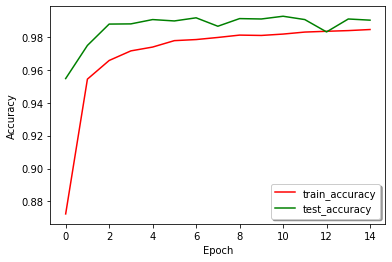

In [74]:
plt.plot(history_RMSprop2.history['accuracy'], color='r')
plt.plot(history_RMSprop2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Adam

In [76]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [77]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
  
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adam2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.0482 - accuracy: 0.0625

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 25s 48ms/step - loss: 0.4358 - accuracy: 0.8612 - val_loss: 0.1113 - val_accuracy: 0.9627
Epoch 2/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1507 - accuracy: 0.9544 - val_loss: 0.0622 - val_accuracy: 0.9808
Epoch 3/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1197 - accuracy: 0.9632 - val_loss: 0.0522 - val_accuracy: 0.9846
Epoch 4/15
525/525 [==============================] - 25s 47ms/step - loss: 0.0994 - accuracy: 0.9691 - val_loss: 0.0397 - val_accuracy: 0.9870
Epoch 5/15
525/525 [==============================] - 26s 49ms/step - loss: 0.0857 - accuracy: 0.9735 - val_loss: 0.0293 - val_accuracy: 0.9899
Epoch 6/15
525/525 [==============================] - 25s 47ms/step - loss: 0.0767 - accuracy: 0.9759 - val_loss: 0.0307 - val_accuracy: 0.9906
Epoch 7/15
525/525 [==============================] - 25s 48ms/step - loss: 0.0700 - accuracy: 0.9785 - val_loss: 0.0397 - val_accuracy: 0.9885
Epo

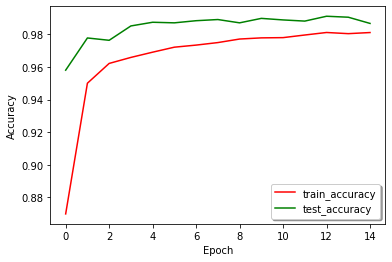

In [73]:
plt.plot(history_Adam2.history['accuracy'], color='r')
plt.plot(history_Adam2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Adamax

In [45]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [46]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adamax'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adamax2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.3554 - accuracy: 0.0625

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 25s 48ms/step - loss: 0.5476 - accuracy: 0.8262 - val_loss: 0.0887 - val_accuracy: 0.9754
Epoch 2/15
525/525 [==============================] - 25s 48ms/step - loss: 0.2113 - accuracy: 0.9343 - val_loss: 0.0616 - val_accuracy: 0.9812
Epoch 3/15
525/525 [==============================] - 25s 48ms/step - loss: 0.1494 - accuracy: 0.9532 - val_loss: 0.0469 - val_accuracy: 0.9865
Epoch 4/15
525/525 [==============================] - 26s 50ms/step - loss: 0.1203 - accuracy: 0.9630 - val_loss: 0.0423 - val_accuracy: 0.9869
Epoch 5/15
525/525 [==============================] - 25s 48ms/step - loss: 0.1081 - accuracy: 0.9666 - val_loss: 0.0335 - val_accuracy: 0.9890
Epoch 6/15
525/525 [==============================] - 26s 50ms/step - loss: 0.0972 - accuracy: 0.9703 - val_loss: 0.0302 - val_accuracy: 0.9912
Epoch 7/15
525/525 [==============================] - 25s 47ms/step - loss: 0.0871 - accuracy: 0.9733 - val_loss: 0.0367 - val_accuracy: 0.9886
Epo

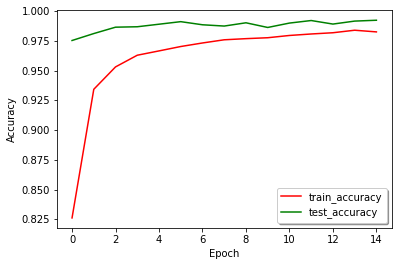

In [72]:
plt.plot(history_Adamax2.history['accuracy'], color='r')
plt.plot(history_Adamax2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

AdaGrad

In [48]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [49]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1, epsilon=1e-07,name='Adagrad'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adagrad2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 2.8873 - accuracy: 0.1406

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 25s 48ms/step - loss: 1.1723 - accuracy: 0.6136 - val_loss: 0.2333 - val_accuracy: 0.9499
Epoch 2/15
525/525 [==============================] - 24s 47ms/step - loss: 0.6426 - accuracy: 0.7985 - val_loss: 0.1578 - val_accuracy: 0.9574
Epoch 3/15
525/525 [==============================] - 25s 48ms/step - loss: 0.4915 - accuracy: 0.8480 - val_loss: 0.1241 - val_accuracy: 0.9670
Epoch 4/15
525/525 [==============================] - 25s 47ms/step - loss: 0.4145 - accuracy: 0.8712 - val_loss: 0.1037 - val_accuracy: 0.9724
Epoch 5/15
525/525 [==============================] - 25s 48ms/step - loss: 0.3726 - accuracy: 0.8870 - val_loss: 0.0997 - val_accuracy: 0.9724
Epoch 6/15
525/525 [==============================] - 25s 47ms/step - loss: 0.3372 - accuracy: 0.8988 - val_loss: 0.0897 - val_accuracy: 0.9758
Epoch 7/15
525/525 [==============================] - 26s 49ms/step - loss: 0.3057 - accuracy: 0.9079 - val_loss: 0.0801 - val_accuracy: 0.9790
Epo

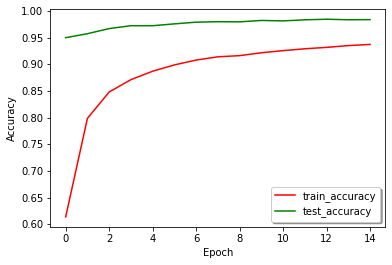

In [71]:
plt.plot(history_Adagrad2.history['accuracy'], color='r')
plt.plot(history_Adagrad2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Adadelta

In [51]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [52]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07,name='Adadelta'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adadelta2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.0958 - accuracy: 0.1250

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 47ms/step - loss: 2.6481 - accuracy: 0.1699 - val_loss: 1.7114 - val_accuracy: 0.4799
Epoch 2/15
525/525 [==============================] - 25s 48ms/step - loss: 2.1934 - accuracy: 0.2843 - val_loss: 1.2315 - val_accuracy: 0.6623
Epoch 3/15
525/525 [==============================] - 25s 48ms/step - loss: 1.9614 - accuracy: 0.3539 - val_loss: 0.9572 - val_accuracy: 0.7521
Epoch 4/15
525/525 [==============================] - 25s 47ms/step - loss: 1.7934 - accuracy: 0.4063 - val_loss: 0.7941 - val_accuracy: 0.7956
Epoch 5/15
525/525 [==============================] - 25s 48ms/step - loss: 1.6731 - accuracy: 0.4459 - val_loss: 0.6792 - val_accuracy: 0.8269
Epoch 6/15
525/525 [==============================] - 25s 48ms/step - loss: 1.5641 - accuracy: 0.4812 - val_loss: 0.5978 - val_accuracy: 0.8470
Epoch 7/15
525/525 [==============================] - 25s 48ms/step - loss: 1.4895 - accuracy: 0.5078 - val_loss: 0.5325 - val_accuracy: 0.8676
Epo

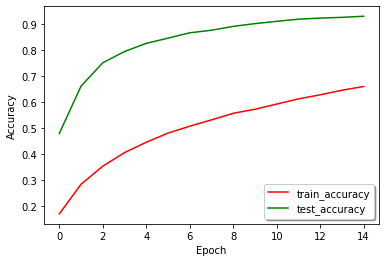

In [70]:
plt.plot(history_Adadelta2.history['accuracy'], color='r')
plt.plot(history_Adadelta2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Nadam

In [54]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [55]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.Nadam(learning_rate=0.001,epsilon=1e-07,name='NAdam'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_NAdam2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  2/525 [..............................] - ETA: 13s - loss: 2.6227 - accuracy: 0.1875

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 31s 59ms/step - loss: 0.3988 - accuracy: 0.8715 - val_loss: 0.0989 - val_accuracy: 0.9705
Epoch 2/15
525/525 [==============================] - 30s 58ms/step - loss: 0.1511 - accuracy: 0.9530 - val_loss: 0.0445 - val_accuracy: 0.9858
Epoch 3/15
525/525 [==============================] - 31s 59ms/step - loss: 0.1166 - accuracy: 0.9650 - val_loss: 0.0579 - val_accuracy: 0.9832
Epoch 4/15
525/525 [==============================] - 31s 59ms/step - loss: 0.0958 - accuracy: 0.9714 - val_loss: 0.0438 - val_accuracy: 0.9874
Epoch 5/15
525/525 [==============================] - 32s 61ms/step - loss: 0.0846 - accuracy: 0.9740 - val_loss: 0.1122 - val_accuracy: 0.9626
Epoch 6/15
525/525 [==============================] - 30s 58ms/step - loss: 0.0817 - accuracy: 0.9740 - val_loss: 0.0567 - val_accuracy: 0.9805
Epoch 7/15
525/525 [==============================] - 32s 60ms/step - loss: 0.0760 - accuracy: 0.9760 - val_loss: 0.0287 - val_accuracy: 0.9902
Epo

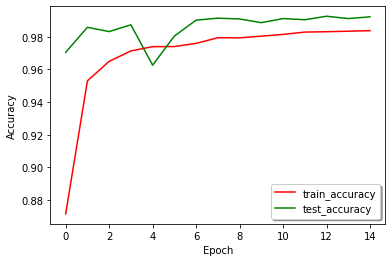

In [69]:
plt.plot(history_NAdam2.history['accuracy'], color='r')
plt.plot(history_NAdam2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

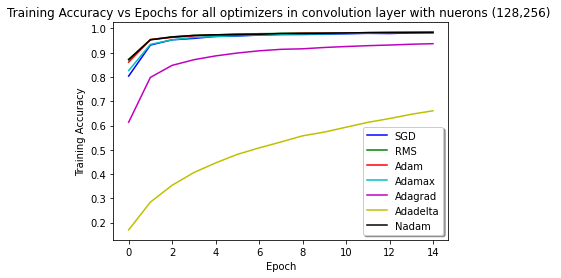

In [108]:
plt.plot(history_SGD2.history['accuracy'], color='b')
plt.plot(history_RMSprop2.history['accuracy'], color='g')
plt.plot(history_Adam2.history['accuracy'], color='r')
plt.plot(history_Adamax2.history['accuracy'], color='c')
plt.plot(history_Adagrad2.history['accuracy'], color='m')
plt.plot(history_Adadelta2.history['accuracy'], color='y')
plt.plot(history_NAdam2.history['accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.title('Training Accuracy vs Epochs for all optimizers in convolution layer with nuerons (128,256) ')
plt.show()



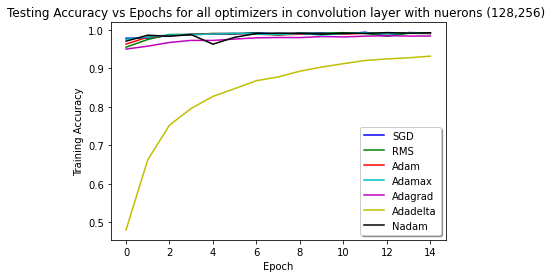

In [109]:
plt.plot(history_SGD2.history['val_accuracy'], color='b')
plt.plot(history_RMSprop2.history['val_accuracy'], color='g')
plt.plot(history_Adam2.history['val_accuracy'], color='r')
plt.plot(history_Adamax2.history['val_accuracy'], color='c')
plt.plot(history_Adagrad2.history['val_accuracy'], color='m')
plt.plot(history_Adadelta2.history['val_accuracy'], color='y')
plt.plot(history_NAdam2.history['val_accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.title('Testing Accuracy vs Epochs for all optimizers in convolution layer with nuerons (128,256) ')
plt.show()



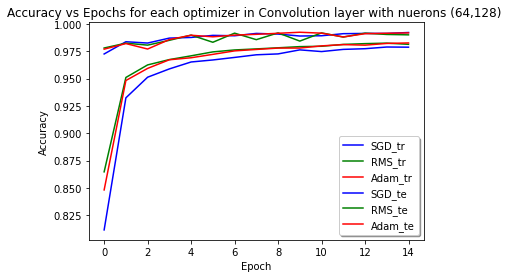

In [110]:
plt.plot(history1.history['accuracy'], color='b')
plt.plot(history_RMSprop.history['accuracy'], color='g')
plt.plot(history1_Adam.history['accuracy'], color='r')

plt.plot(history1.history['val_accuracy'], color='b')
plt.plot(history_RMSprop.history['val_accuracy'], color='g')
plt.plot(history1_Adam.history['val_accuracy'], color='r')


plt.legend(('SGD_tr','RMS_tr','Adam_tr','SGD_te','RMS_te','Adam_te'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (64,128) ')
plt.show()

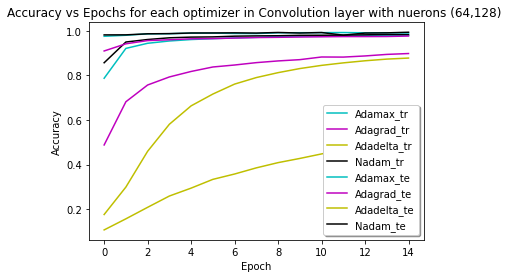

In [111]:
plt.plot(history_Adamax1.history['accuracy'], color='c')
plt.plot(history_Adagrad1.history['accuracy'], color='m')
plt.plot(history_Adadelta1.history['accuracy'], color='y')
plt.plot(history_NAdam1.history['accuracy'], color='k')
plt.plot(history_Adamax1.history['val_accuracy'], color='c')
plt.plot(history_Adagrad1.history['val_accuracy'], color='m')
plt.plot(history_Adadelta1.history['val_accuracy'], color='y')
plt.plot(history_NAdam1.history['val_accuracy'], color='k')
plt.legend(('Adamax_tr','Adagrad_tr','Adadelta_tr','Nadam_tr','Adamax_te','Adagrad_te','Adadelta_te','Nadam_te'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (64,128) ')
plt.show()

In [59]:
print('DONE!')

DONE!


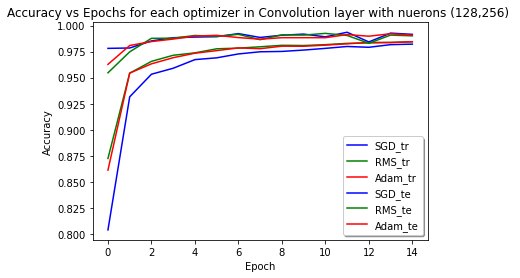

In [112]:
plt.plot(history_SGD2.history['accuracy'], color='b')
plt.plot(history_RMSprop2.history['accuracy'], color='g')
plt.plot(history_Adam2.history['accuracy'], color='r')

plt.plot(history_SGD2.history['val_accuracy'], color='b')
plt.plot(history_RMSprop2.history['val_accuracy'], color='g')
plt.plot(history_Adam2.history['val_accuracy'], color='r')


plt.legend(('SGD_tr','RMS_tr','Adam_tr','SGD_te','RMS_te','Adam_te'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (128,256) ')
plt.show()

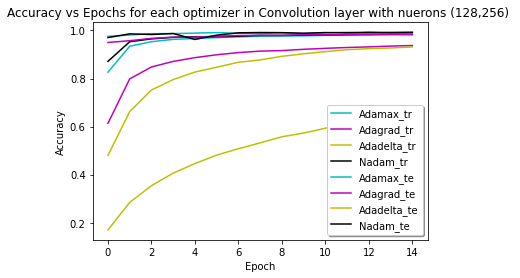

In [113]:
plt.plot(history_Adamax2.history['accuracy'], color='c')
plt.plot(history_Adagrad2.history['accuracy'], color='m')
plt.plot(history_Adadelta2.history['accuracy'], color='y')
plt.plot(history_NAdam2.history['accuracy'], color='k')
plt.plot(history_Adamax2.history['val_accuracy'], color='c')
plt.plot(history_Adagrad2.history['val_accuracy'], color='m')
plt.plot(history_Adadelta2.history['val_accuracy'], color='y')
plt.plot(history_NAdam2.history['val_accuracy'], color='k')
plt.legend(('Adamax_tr','Adagrad_tr','Adadelta_tr','Nadam_tr','Adamax_te','Adagrad_te','Adadelta_te','Nadam_te'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (128,256) ')
plt.show()